 # Jimmy Wrangler, Data Explorer
- EECS 731 Project 1
- Author: Lazarus
- ID : 3028051
 
## Problem Statement
### Traveling the world on a mission to discover new data
- Set up a data science project structure in a new git repository in your GitHub account
- Install Jupyter notebook prerequisites (Anaconda, Python, etc.)
- Select an industry
- Select two to three public data sets from that industry
- Load the data sets into panda data frames following the 10 minutes to pandas guide
- Formulate one or two ideas on how the data sets could be combined to establish additional value using exploratory data analysis
- Transform the data sets into a single data set while following data preparation processes to clean and transform features (use pandas documentation for help)
- Document your process and results
- Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

## What we want to do?
- Let's Analyse two stock's Closing prices 3/1/1973 to 4/1/2020.
- Bank of America Corp's and Wells Fargo & Co's are the top two banks in USA in terms of assets with over 2 Trillion US dollars. Let's analyse how these two stocks were affected and later recovered by two of the most devastating market crashes in the history. 
- We could get the stock' data in two seperate files BAC.csv and WFC.csv from  https://www.kaggle.com/jacksoncrow/stock-market-dataset.

## Step1: Lets start by importing few libraries
- We need numpy and pandas for analysing and exploring data
- We need pyplot from matplotlib to visualize our findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step2: Loading BOA's stock data into dataframe

In [2]:
boa=pd.read_csv('../data/BAC.csv')
boa.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/1973,4.656250,4.656250,4.656250,4.656250,0.358559,93600.0
1,3/2/1973,4.671875,4.671875,4.671875,4.671875,0.359762,26400.0
2,3/5/1973,4.734375,4.734375,4.734375,4.734375,0.364575,68000.0
3,3/6/1973,4.875000,4.875000,4.875000,4.875000,0.375404,76800.0
4,3/7/1973,4.875000,4.875000,4.875000,4.875000,0.375404,51200.0


## Step3: Loading WFC's stock data into data frame

In [3]:
wfc=pd.read_csv('../data/WFC.csv')
wfc.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/1973,1.117188,1.125000,1.117188,1.117188,0.002771,100800
1,3/2/1973,1.117188,1.125000,1.111979,1.122396,0.002784,52800
2,3/5/1973,1.135417,1.151042,1.135417,1.145833,0.002842,96000
3,3/6/1973,1.145833,1.151042,1.140625,1.140625,0.002829,57600
4,3/7/1973,1.140625,1.140625,1.130208,1.135417,0.002816,81600


## Step4: Data Transformation
### let's change attribute names of BOA's dataframe

In [4]:
boa.rename(
columns={
    'Open': 'BOA_open',
    'High': 'BOA_high',
    'Low': 'BOA_low',
    'Close': 'BOA_close',
    'Adj Close': 'BOA_adj_close',
    'Volume': 'BOA_volume'
}, inplace=True
)
boa.head(5)

,Date,BOA_open,BOA_high,BOA_low,BOA_close,BOA_adj_close,BOA_volume
0,3/1/1973,4.656250,4.656250,4.656250,4.656250,0.358559,93600.0
1,3/2/1973,4.671875,4.671875,4.671875,4.671875,0.359762,26400.0
2,3/5/1973,4.734375,4.734375,4.734375,4.734375,0.364575,68000.0
3,3/6/1973,4.875000,4.875000,4.875000,4.875000,0.375404,76800.0
4,3/7/1973,4.875000,4.875000,4.875000,4.875000,0.375404,51200.0


### Let's also change attribute names of WFC's stock dataframe

In [5]:
wfc.rename(
columns={
    'Open': 'WFC_open',
    'High': 'WFC_high',
    'Low': 'WFC_low',
    'Close': 'WFC_close',
    'Adj Close': 'WFC_adj_close',
    'Volume': 'WFC_volume'
}, inplace=True
)
wfc.head(5)

,Date,WFC_open,WFC_high,WFC_low,WFC_close,WFC_adj_close,WFC_volume
0,3/1/1973,1.117188,1.125000,1.117188,1.117188,0.002771,100800
1,3/2/1973,1.117188,1.125000,1.111979,1.122396,0.002784,52800
2,3/5/1973,1.135417,1.151042,1.135417,1.145833,0.002842,96000
3,3/6/1973,1.145833,1.151042,1.140625,1.140625,0.002829,57600
4,3/7/1973,1.140625,1.140625,1.130208,1.135417,0.002816,81600


### We will now merge both dataframes into one using the common date attribute as the key

In [6]:
result_data=pd.merge(boa, wfc, how='outer', left_on=['Date'], right_on=['Date'])
result_data.head(5)

,Date,BOA_open,BOA_high,BOA_low,BOA_close,BOA_adj_close,BOA_volume,WFC_open,WFC_high,WFC_low,WFC_close,WFC_adj_close,WFC_volume
0,3/1/1973,4.656250,4.656250,4.656250,4.656250,0.358559,93600.0,1.117188,1.125000,1.117188,1.117188,0.002771,100800.0
1,3/2/1973,4.671875,4.671875,4.671875,4.671875,0.359762,26400.0,1.117188,1.125000,1.111979,1.122396,0.002784,52800.0
2,3/5/1973,4.734375,4.734375,4.734375,4.734375,0.364575,68000.0,1.135417,1.151042,1.135417,1.145833,0.002842,96000.0
3,3/6/1973,4.875000,4.875000,4.875000,4.875000,0.375404,76800.0,1.145833,1.151042,1.140625,1.140625,0.002829,57600.0
4,3/7/1973,4.875000,4.875000,4.875000,4.875000,0.375404,51200.0,1.140625,1.140625,1.130208,1.135417,0.002816,81600.0


## Step5: Data Exploration:
- To understand how these stocks were performing all through out 1973 to 2020, we have to take a look at the daily closing prices of both stocks.

### Lets take closing prices from the combined dataframe into a new one to keep it simple.

In [7]:
close_data=result_data.filter(['Date','BOA_close','WFC_close'])
close_data=close_data.set_index('Date')
close_data.head(5)

,BOA_close,WFC_close
Date,,
3/1/1973,4.656250,1.117188
3/2/1973,4.671875,1.122396
3/5/1973,4.734375,1.145833
3/6/1973,4.875000,1.140625
3/7/1973,4.875000,1.135417


### Step6: Data Visualization
- As there are more than 11,000 days in the period of 1973 to 2020, we can't look at data in numbers, to get a clear understanding we would have to plot the data.

### Let's plot closing prices of both stocks:
- Also, let us save the plots as image files for including them in reports

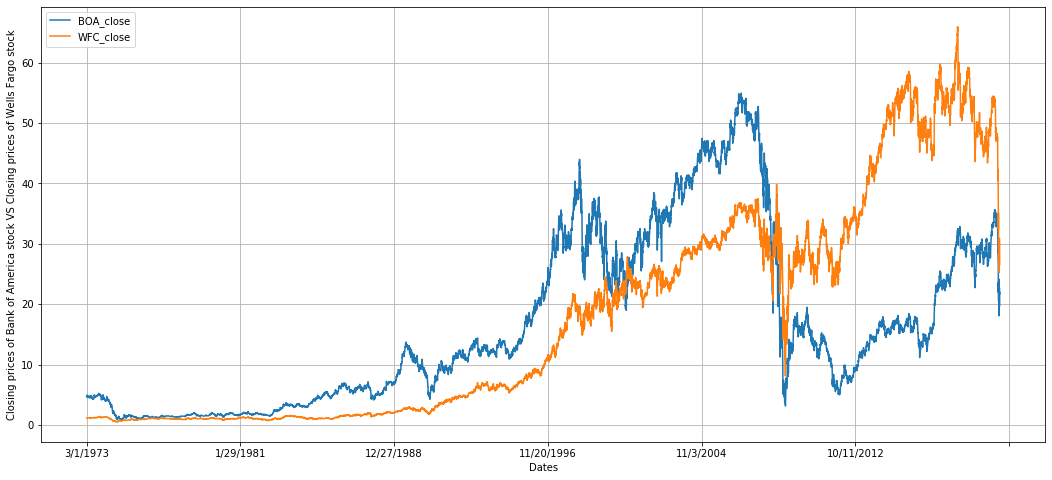

In [8]:
ax=plt.gca()
close_data.plot(x_compat=True,figsize=(18,8), ax=ax)
ax.set_xlabel("Dates")
ax.set_ylabel("Closing prices of Bank of America stock VS Closing prices of Wells Fargo stock")

ax.grid(True)
# plt.savefig('Closing_Prices_Comparision.png')

- Wow, that's a lot of data, if not for these graphs we could not make sense of this data.
- First thing that cathes my eye is that there is sudden dip between 2007 and 2008, until then both of the stock's closing prices, starting from less than 5USD in 1973 had increased gradually more than 35USD in 2007.
- This sudden dip was due to Global Financial Crisis in between 2007 and 2008.
- Something changed after this unexpected market crash, Bank of America which was always leading from the very beginning, couldn't recover as good as Well's Fargo did.
- Then comes the recent Market crash in 2020 due to pandemic, which again caused a huge damage, fortunately banking sector was not among the worst affected. We have to wait and see if BOA could take over WFC's closing price after this market crash.
- One more thing, I am very much interested in looking at the everyday volume of both the stocks through put this period as Stock volume is a measure of the number of stock shares that have been exchanged or traded within a specific period of time(usually daily). It's essentially how much buying and selling was going on within that period of time.
- So, when trading volume is higher, you'll have an easier time buying and selling large or small quantities of stock, because other traders are in the market, waiting to fulfill the other side of your trade.
- We can understand which stock was popular among traders during those difficult times.

### Step5(contd.): Data Exploration
- To understand how popular these stocks were among investors all through out 1973 to 2020, we have to take a look at the volume attributes of both stocks from combined dataframe.

In [10]:
volume_data=result_data.filter(['Date','BOA_volume','WFC_volume'])
volume_data=volume_data.set_index('Date')
volume_data.head(5)

,BOA_volume,WFC_volume
Date,,
3/1/1973,93600.0,100800.0
3/2/1973,26400.0,52800.0
3/5/1973,68000.0,96000.0
3/6/1973,76800.0,57600.0
3/7/1973,51200.0,81600.0


## Step6(Contd.): Data Visualization

### Let us plot both of the stock volumes
- Also we have to save plot as an image file to include in reports

Text(0, 0.5, 'Volume of Bank of America stock VS Volume of Wells Fargo stock')

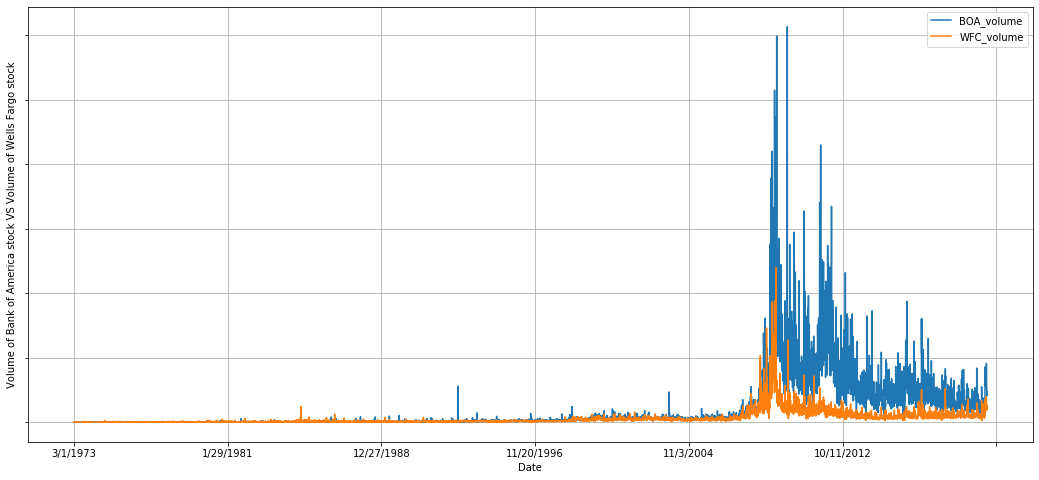

In [11]:
vol_ax=plt.gca()
volume_data.plot(figsize=(18,8), ax=vol_ax)
vol_ax.set_xlabel("Date")
vol_ax.grid(True)
vol_ax.axes.yaxis.set_ticklabels([])
vol_ax.set_ylabel("Volume of Bank of America stock VS Volume of Wells Fargo stock")
# plt.savefig('Volume_Comparision.png')

- It is so surprising that although BOA's stock had more volume it could not recover as good as WFC's stock.
- There was huge amount of stock volume especially after 2007-2008 Global financial crisis. This only says that a lot of investors were interested in BOA's stock.

- This was my analysis from the two stocks data. There is still scope for lot of research in these two stocks itself also it would be great to predict how these stocks would recover from 2020 market crash.

### Let's export the combined dataset for future reference.

In [12]:
# result_data=result_data.set_index('Date')
# result_data.to_csv('result_data.csv')